# Final Project: The Best Neighborhood in Pittsburgh

#### Shanker Pillai and Parsa Mirlohi

## Introduction

In this project, we used python and the pandas library to analyze datasets found on the WPRDC website. While it is far from the only metric when deciding the quality of a neighborhood, we chose safety as our main metric, which we felt was the most important quality. While safety itself is a broad term, we expected to find many quality datasets describing different aspects of safety, and that safety would be linked to other positive qualities of a neighborhood thus giving us a good basis to decide which Pittsburgh Neighborhood is best.

## The Metric

In measuring safety, we decided to incorporate three qualities: Crime, General Age of Death, and Deaths from Covid-19. For each of the submetrics, we had datasets measuring every police incident, median age of death by neighborhood, and number of deaths from COVID-19 by neighborhood respectively. We also used a dataset with the population of each neighborhood for reference purposes with the incident data. With crime, we decided to use the ratio of incidents to population to decide which neighborhoods were better. This way, larger neighborhoods would not be unfairly punished. This reasoning is somewhat flawed, as it assumes every neighborhood is uniformly policed, which is untrue. We attempted to find a dataset of police presence by neighborhood to compare to rather than population, but could not find a good dataset. It also assumes that each incident is equal and does not distinguish between severity of the incident. Once we shortlisted neighborhoods with low crime rates, we then looked at these neighborhoods by median age of death and number of covid deaths to narrow down to a single neighborhood. Median age of death would assist in seeing the type of healthcare and level of health seen in the neighborhood.

## The Best Neighborhood

For the incident data, we converted the .csv file into a pandas DataFrame. We then used the dataframe and the iterrows() method to put the desired values into a python dictionary. The key was the name of the neighborhood, and each key is connected to the number of incidents that took place in that neighborhood. A new key is created every time a new neighborhood is found in the dataset. In this way, we created a dictionary of the number of incidents in each neighborhood, as shown below.

In [1]:
import pandas as pd
ad=pd.read_csv("arrestdata.csv")
d1=pd.DataFrame(ad)
dc1=dict()

for index, row in d1.iterrows():
    s1=row['INCIDENTNEIGHBORHOOD']
    if s1 not in dc1:
        dc1[s1]=1
    else:
        dc1[s1]=dc1[s1]+1
        
print(dc1)

{'Bloomfield': 930, 'Outside City': 298, 'Westwood': 209, 'East Allegheny': 2014, 'Crafton Heights': 546, 'Greenfield': 497, 'Brookline': 1268, 'Regent Square': 35, 'East Liberty': 1733, nan: 2326, 'East Hills': 1084, 'Carrick': 2199, 'Allegheny Center': 1181, 'South Side Flats': 3186, 'Sheraden': 1192, 'East Carnegie': 48, 'Golden Triangle/Civic Arena': 83, 'Point Breeze North': 261, 'Perry South': 990, 'Allentown': 884, 'North Shore': 759, 'Marshall-Shadeland': 1406, 'Central Oakland': 488, 'Middle Hill': 880, 'Strip District': 472, 'Lincoln-Lemington-Belmar': 1219, 'Central Northside': 23, 'Troy Hill-Herrs Island': 6, 'Highland Park': 530, 'Homewood North': 1837, 'Northview Heights': 662, 'Brighton Heights': 1025, 'Hazelwood': 1287, 'Perry North': 567, 'Bedford Dwellings': 616, 'Elliott': 619, 'Beechview': 1116, 'Fineview': 773, 'Glen Hazel': 153, 'Spring Hill-City View': 667, 'Bluff': 1371, 'Manchester': 445, 'Homewood West': 732, 'Outside County': 52, 'Point Breeze': 287, 'Homewoo

Of course, since each neighborhood has a different population, that would have to be accounted for. We used another dataset with the population of each neighborhood. We then made another dictionary with each neighborhood in the first dictionary as the key connected with its ratio of incidents to population. From every Pittsburgh neighborhood, we decided to limit the results to neighborhoods with a ratio less than 0.1, as in less than one incident per 10 people. We narrowed it down to the neighborhoods below:

In [2]:
import pandas as pd
ad=pd.read_csv("arrestdata.csv")
d1=pd.DataFrame(ad)
dc1=dict()

for index, row in d1.iterrows():
    s1=row['INCIDENTNEIGHBORHOOD']
    if s1 not in dc1:
        dc1[s1]=1
    else:
        dc1[s1]=dc1[s1]+1
        
pop=pd.read_csv("pop1.csv")
d2=pd.DataFrame(pop)
v1=1000
dc2=dict()
s8=""
p8=0
for index, row in d2.iterrows():
    s1=row['Neighborhood']
    p1=row['2020_Total_Population']
    if s1 in dc1:
        dc2[s1]=(dc1[s1]/p1)
        if (dc1[s1]/p1)<v1:
            v1=dc1[s1]/p1
            s8=s1
            p8=p1
            
print(str(v1)+" "+s8+" "+str(p8))
for key in dc2:
    if dc2[key]<0.1:
        print(key+": "+str(dc2[key]))

0.007738896366083445 Central Northside 2972
Banksville: 0.065907438817543
Brookline: 0.09706805481129908
Central Lawrenceville: 0.08792372881355932
Central Northside: 0.007738896366083445
Central Oakland: 0.08363324764353042
Chartiers City: 0.08130081300813008
Duquesne Heights: 0.0755110554860242
East Carnegie: 0.09775967413441955
Friendship: 0.07997962302598065
Greenfield: 0.06844787219391268
Highland Park: 0.08500400962309543
Lincoln Place: 0.0652931854199683
Lower Lawrenceville: 0.09428246876183263
Morningside: 0.055350553505535055
New Homestead: 0.04252998909487459
North Oakland: 0.03825647741090637
Oakwood: 0.07707317073170732
Overbrook: 0.08440999138673558
Point Breeze: 0.05366492146596859
Regent Square: 0.03604531410916581
Ridgemont: 0.08974358974358974
Shadyside: 0.058627668603512435
South Oakland: 0.09732652448182637
Squirrel Hill North: 0.022729185958414007
Squirrel Hill South: 0.050336227720833064
Stanton Heights: 0.04743618703410888
Summer Hill: 0.06713426853707415
Swisshel

We then moved to the next criteria, which was Median Age of Death. This would hopefully describe the level of healthcare seen in the area, a key component of safety. To find a set, we simply sorted through the dataset (converted to a dataframe) and listed every neighborhood with a median age of death greater than 80 thant also had over 100 deaths to account for population. This resulted in the following neighborhoods. We also created a bar graph representation of the data using the matplotlib library of python.

In [3]:
import pandas as pd
ages=pd.read_csv("nhoodmedianage20112015.csv")
d1=pd.DataFrame(ages)
for index, row in d1.iterrows():
    if row['TOTALdeaths*']>100:
        if row['TOTAL MD AGE AT DEATH']>80:
            print(row['NEIGHBORHOOD']+": "+str(row['TOTAL MD AGE AT DEATH']))

POINT BREEZE: 85.1
UPPER HILL: 81.7
SQUIRREL HILL NORTH: 85.0
BANKSVILLE: 85.5
STANTON HEIGHTS: 80.5
NORTH OAKLAND: 85.6
OVERBROOK: 82.2
CENTRAL LAWRENCEVILLE: 81.3
SHADYSIDE: 82.1
SQUIRREL HILL SOUTH: 85.9


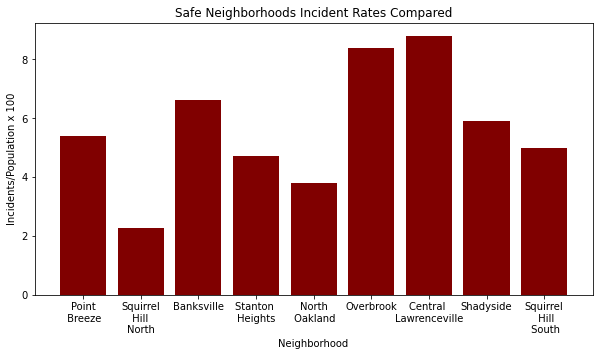

In [4]:
import numpy as np
import matplotlib.pyplot as plt
 
  
data = {'Point\n Breeze':5.4, 'Squirrel\n Hill \nNorth':2.27, 'Banksville':6.6,
        'Stanton \nHeights':4.7, 'North\n Oakland':3.8, 'Overbrook':8.4, 'Central \nLawrenceville':8.8, 'Shadyside':5.9, 'Squirrel\n Hill\n South':5.0}
places = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(places, values, color ='maroon',
        width = 0.8)
 
plt.xlabel("Neighborhood")
plt.ylabel("Incidents/Population x 100")
plt.title("Safe Neighborhoods Incident Rates Compared")
plt.show()

Other than Upper Hill, each of these neighborhoods were also found in the shortlist of low incidents, so we could consider these neighborhoods to be safe. Since we had to narrow this list down to one neighborhood, we moved on to our last criteria, which would be number of deaths from COVID-19. We felt that this could be an indicator of the healthy practices of the citizens of a neighborhood. We simply tested each neighborhood above to find which had the lowest number of COVID-19 deaths. Out of the above neighborhoods, we found Point Breeze to have the lowest number of COVID deaths, thus allowing us to conclude based on our analysis that Point Breeze is the best Pittsburgh Neighborhood.

## Conclusion

Based on our data-driven determination, Point Breeze is the safest, and thus best Pittsburgh neighborhood. Personally we had never heard of Point Breeze, but on further research, it does seem to earn its place. Point Breeze has three well-regarded high schools, Frick Art and Historical Center, Westinghouse Park, Mellon Park, and parts of Frick Park. One of my (Shanker) favorite neighborhoods is Squirrel Hill, which was also one of the safest neighborhoods according to our study although it had more deaths due to COVID-19. My favorite neighborhood (Parsa) is the Strip District due to the many cultural attractions but as seen in our study it is not quite as safe as some of the other neighborhoods in Pittsburgh. 